<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_3_Tatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

képek letölétése

In [32]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Reynolds.png

--2024-11-06 14:07:17--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Reynolds.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421952 (412K) [image/png]
Saving to: ‘Reynolds.png.3’

Reynolds.png.3      100%[===================>] 412.06K  2.14MB/s    in 0.2s    

2024-11-06 14:07:18 (2.14 MB/s) - ‘Reynolds.png.3’ saved [421952/421952]



In [33]:
# Haar kaszkádolók betöltése
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

(-0.5, 512.5, 517.5, -0.5)

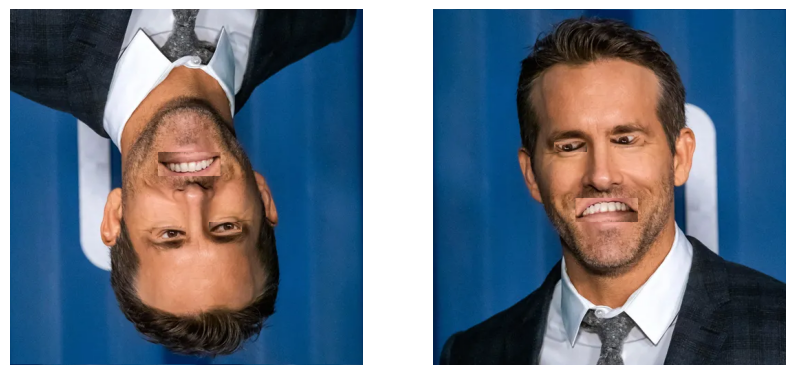

In [34]:
# Kép betöltése
# grayscale konvertálás szükségtelen, mert a cascade.detectMultiScale() konvertál helyettünk is
img = cv2.imread("Reynolds.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

exo = 0 # szem offset, hogy ne vágjuk ki pl. a szemöldököt is (Eye X Offset)
eyo = 17

# Szemek detektálása
eyes = eye_cascade.detectMultiScale(img, 1.01, 500)
if len(eyes) > 0:
  for (x, y, w, h) in eyes[:2]: # csak az első 2 talált szemet vesszük figyelembe
    eye_region = img[y+eyo:y+h-eyo, x+exo:x+w-exo] # szem régió megtalálása
    rotated_eye = cv2.rotate(eye_region, cv2.ROTATE_180) # régió elforgatása 180 fokkal
    img[y+eyo:y+h-eyo, x+exo:x+w-exo] = rotated_eye # szem régió képre rajzolása

mxo = 10
myo = 10

# Száj detektálása
mouths = mouth_cascade.detectMultiScale(img, 1.1, 600)
if len(mouths) > 0:
  (x, y, w, h) = mouths[0]
  mouth_region = img[y+myo:y+h-myo, x+mxo:x+w-mxo]
  rotated_mouth = cv2.rotate(mouth_region, cv2.ROTATE_180)
  img[y+myo:y+h-myo, x+mxo:x+w-mxo] = rotated_mouth

# Kép fejjel lefelé forgatása
thatcher_img = cv2.rotate(img, cv2.ROTATE_180)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(thatcher_img)
ax[0].axis('off')
ax[1].imshow(img)
ax[1].axis('off')